In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline


In [2]:
import math

In [4]:
data = pd.read_csv('marketing_customer_analysis.csv')
data.head()

Customer       State  Customer Lifetime Value Response  Coverage Education  \
0  BU79786  Washington              2763.519279       No     Basic  Bachelor   
1  QZ44356     Arizona              6979.535903       No  Extended  Bachelor   
2  AI49188      Nevada             12887.431650       No   Premium  Bachelor   
3  WW63253  California              7645.861827       No     Basic  Bachelor   
4  HB64268  Washington              2813.692575       No     Basic  Bachelor   

  Effective To Date EmploymentStatus Gender  Income  ...  \
0           2/24/11         Employed      F   56274  ...   
1           1/31/11       Unemployed      F       0  ...   
2           2/19/11         Employed      F   48767  ...   
3           1/20/11       Unemployed      M       0  ...   
4            2/3/11         Employed      M   43836  ...   

  Months Since Policy Inception Number of Open Complaints  Number of Policies  \
0                             5                         0                   1   
1                            42                         0                   8   
2                            38                         0                   2   
3                            65                         0                   7   
4                            44                         0                   1   

      Policy Type        Policy  Renew Offer Type  Sales Channel  \
0  Corporate Auto  Corporate L3            Offer1          Agent   
1   Personal Auto   Personal L3            Offer3          Agent   
2   Personal Auto   Personal L3            Offer1          Agent   
3  Corporate Auto  Corporate L2            Offer1    Call Center   
4   Personal Auto   Personal L1            Offer1          Agent   

  Total Claim Amount  Vehicle Class Vehicle Size  
0         384.811147   Two-Door Car      Medsize  
1        1131.464935  Four-Door Car      Medsize  
2         566.472247   Two-Door Car      Medsize  
3         529.881344            SUV      Medsize  
4         138.130879  Four-Door Car      Medsize  

[5 rows x 24 columns]

In [ ]:
'''Select the columns which are correlated with total_claim_amount and don't suffer from multicollinearity 
(see the previous lab

In [5]:
data_corre= data[['Customer Lifetime Value', 'Monthly Premium Auto', 'Total Claim Amount']]

In [6]:
data_corre.head()

Customer Lifetime Value  Monthly Premium Auto  Total Claim Amount
0              2763.519279                    69          384.811147
1              6979.535903                    94         1131.464935
2             12887.431650                   108          566.472247
3              7645.861827                   106          529.881344
4              2813.692575                    73          138.130879

In [ ]:
'''Remove outliers

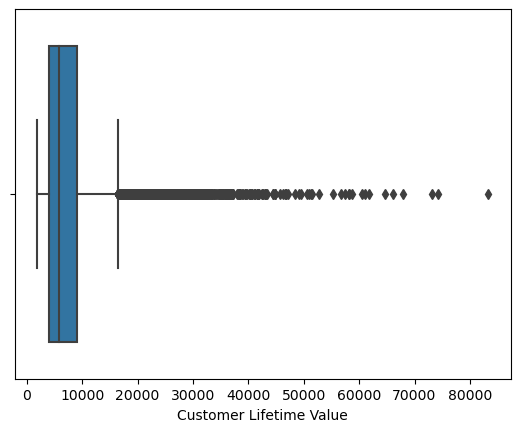

In [7]:
sns.boxplot(x=data_corre['Customer Lifetime Value'])
plt.show()


In [10]:
iqr1 = np.percentile(data_corre['Customer Lifetime Value'],75) - np.percentile(data_corre['Customer Lifetime Value'],25)
upper_wisker1 = np.percentile(data_corre['Customer Lifetime Value'],75) + 1.5*iqr1
lower_wisker1 = np.percentile(data_corre['Customer Lifetime Value'],25) - 1.5*iqr1

In [16]:
data_corre = data_corre[(data_corre['Customer Lifetime Value']>lower_wisker1) & (data_corre['Customer Lifetime Value']<upper_wisker1)]

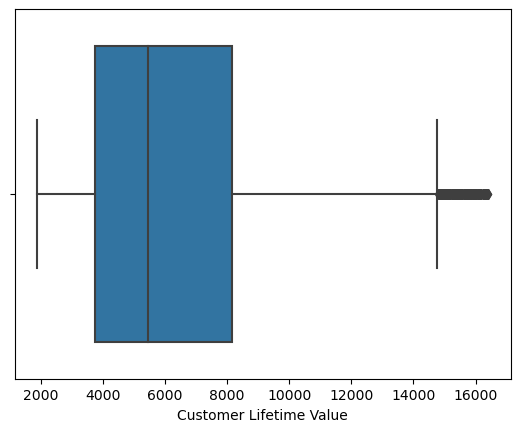

In [12]:
sns.boxplot(x=data_corre['Customer Lifetime Value'])
plt.show()


In [18]:
iqr2 = np.percentile(data_corre['Monthly Premium Auto'],75) - np.percentile(data_corre['Monthly Premium Auto'],25)
upper_wisker2 = np.percentile(data_corre['Monthly Premium Auto'],75) + 1.5*iqr2
lower_wisker2 = np.percentile(data_corre['Monthly Premium Auto'],25) - 1.5*iqr2
data_corre = data_corre[(data_corre['Monthly Premium Auto']>lower_wisker2) & (data_corre['Monthly Premium Auto']<upper_wisker2)]

In [19]:
iqr3 = np.percentile(data_corre['Total Claim Amount'],75) - np.percentile(data_corre['Total Claim Amount'],25)
upper_wisker3 = np.percentile(data_corre['Total Claim Amount'],75) + 1.5*iqr3
lower_wisker3 = np.percentile(data_corre['Total Claim Amount'],25) - 1.5*iqr3
data_corre = data_corre[(data_corre['Total Claim Amount']>lower_wisker3) & (data_corre['Total Claim Amount']<upper_wisker3)]

In [ ]:
'''X-y split. (define which column you want to predict, and which ones you will use to make the prediction)

In [24]:
y = data_corre['Customer Lifetime Value']
X = data_corre[['Total Claim Amount','Monthly Premium Auto']]

In [25]:
type(y)

pandas.core.series.Series

In [26]:
type(X)

pandas.core.frame.DataFrame

In [27]:
from sklearn.linear_model import LinearRegression
lm = LinearRegression()
lm.fit(X,y) 
print(lm.intercept_) 
print(lm.coef_)

897.2068903004119
[-0.64101626 63.2314648 ]


In [28]:
lm.predict(X)

array([5013.50776016, 7363.08716888, 7260.07960299, ..., 5764.97536786,
       6524.35707381, 5529.11007109])

In [29]:
X.describe().T

count        mean         std        min         25%  \
Total Claim Amount    7784.0  378.992988  200.015141   0.099007  253.151853   
Monthly Premium Auto  7784.0   85.823356   21.636895  61.000000   68.000000   

                        50%         75%    max  
Total Claim Amount    355.2  513.533318  921.6  
Monthly Premium Auto   77.0  103.000000  160.0

In [ ]:
'''Use the Train-test split to create the Train, and Test sets 
(make sure to set the random_state option to any integer number of your choice).
Use the pd.DataFrame() function to create new Pandas DataFrames from the X_train, 
and X_test Numpy arrays obtained in the previous step 
(make sure to use the columns= option to set the columns names to X.columns).

In [30]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=50)
X_train_df = pd.DataFrame(X_train, columns = X.columns)
X_test_df  = pd.DataFrame(X_test,  columns = X.columns)

In [32]:
import pickle
from sklearn.preprocessing import MinMaxScaler 

scaler = MinMaxScaler()

scaler.fit(X_train_df) 

path = "./"
scaler_file_name = "min_max_scalerlab.pkl"

with open(path + scaler_file_name, "wb") as file:
    pickle.dump(scaler, file)

X_train_scaled = scaler.transform(X_train_df) 
X_test_scaled  = scaler.transform(X_test_df) 



X_train_scaled_df = pd.DataFrame(X_train_scaled, columns=X.columns)
X_test_scaled_df  = pd.DataFrame(X_test_scaled,  columns=X.columns)

X_train_scaled_df.head()

Total Claim Amount  Monthly Premium Auto
0            0.671739              0.252525
1            0.054212              0.383838
2            0.957960              0.383838
3            0.305021              0.010101
4            0.489372              0.333333

In [33]:
X_train_scaled_df.describe().T

count      mean       std  min       25%       50%  \
Total Claim Amount    6227.0  0.411779  0.217843  0.0  0.274214  0.385162   
Monthly Premium Auto  6227.0  0.251035  0.218409  0.0  0.070707  0.171717   

                           75%  max  
Total Claim Amount    0.557108  1.0  
Monthly Premium Auto  0.424242  1.0

In [34]:
from sklearn.linear_model import LinearRegression

linear_model = LinearRegression()
linear_model.fit(X_train_scaled_df, y_train) 

path = "./"
model_file_name = "linear_modellab.pkl"

with open(path + scaler_file_name, "wb") as file:
    pickle.dump(linear_model, file)

In [35]:
y_train_pred = linear_model.predict(X_train_scaled_df)
y_test_pred  = linear_model.predict(X_test_scaled_df)

In [37]:
results = {"Set": ["Train"]*X_train.shape[0] + ["Test"]*X_test.shape[0], 
           "Real": list(y_train) + list(y_test),
           "Predicted": list(y_train_pred) + list(y_test_pred)}

results_df = pd.DataFrame(results)
results_df.head()

Set          Real    Predicted
0  Train   5337.352409  5894.634344
1  Train  11895.181880  7140.935679
2  Train   3939.006370  6502.800292
3  Train   7409.586372  4657.697399
4  Train   3755.806897  6522.029051

In [38]:
results_df['Errors'] = results_df['Real'] - results_df['Predicted']
results_df.head()

Set          Real    Predicted       Errors
0  Train   5337.352409  5894.634344  -557.281935
1  Train  11895.181880  7140.935679  4754.246201
2  Train   3939.006370  6502.800292 -2563.793922
3  Train   7409.586372  4657.697399  2751.888973
4  Train   3755.806897  6522.029051 -2766.222154

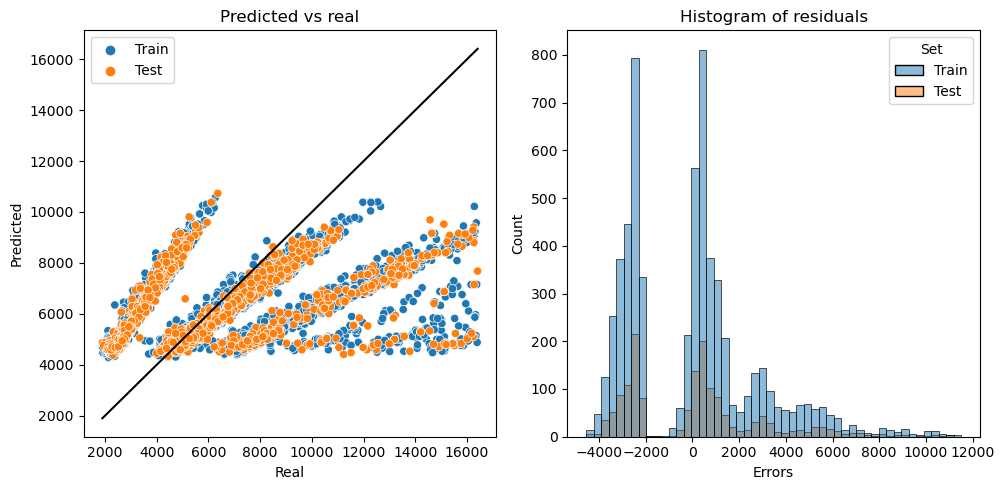

In [39]:
fig, ax = plt.subplots(1,2, figsize=(10,5))

sns.scatterplot(results_df, x="Real", y="Predicted", hue="Set", ax=ax[0])
sns.lineplot(results_df, x="Real", y="Real", color="black", ax=ax[0])
ax[0].set_title("Predicted vs real")
sns.histplot(results_df, x="Errors", bins=50, hue="Set", ax=ax[1])
ax[1].set_title("Histogram of residuals")

plt.tight_layout()
plt.show()

In [41]:
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score



In [42]:
def error_metrics_report(y_real_train: list, y_real_test: list, y_pred_train: list, y_pred_test: list) -> pd.DataFrame:
   

    MAE_train = mean_absolute_error(y_real_train, y_pred_train)
    MAE_test  = mean_absolute_error(y_real_test, y_pred_test)

    
    MSE_train = mean_squared_error(y_real_train, y_pred_train)
    MSE_test  = mean_squared_error(y_real_test, y_pred_test)

    
    RMSE_train = mean_squared_error(y_real_train, y_pred_train, squared=False)
    RMSE_test  = mean_squared_error(y_real_test, y_pred_test, squared=False)

   
    R2_train = r2_score(y_real_train, y_pred_train)
    R2_test  = r2_score(y_real_test, y_pred_test)

    results = {"Metric": ['MAE', 'MSE', 'RMSE', 'R2'], 
               "Train": [MAE_train, MSE_train, RMSE_train, R2_train],
               "Test":  [MAE_test, MSE_test, RMSE_test, R2_test]}

    results_df = pd.DataFrame(results).round(2)

    return results_df

In [43]:
error_metrics_report(list(results_df[results_df["Set"]=="Train"]["Real"]),
                     list(results_df[results_df["Set"]=="Test"]["Real"]),
                     list(results_df[results_df["Set"]=="Train"]["Predicted"]),
                     list(results_df[results_df["Set"]=="Test"]["Predicted"]))

Metric       Train        Test
0    MAE     2171.07     2193.56
1    MSE  7909350.26  8211121.79
2   RMSE     2812.36     2865.51
3     R2        0.17        0.20